In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dfDir = '/content/drive/MyDrive/Cleaned_Datasets.xlsx'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel(dfDir)

In [4]:
df.shape
df.head()

,Program (First Choice),Program (Second Choice),Current Region,Current Province,City/Municipality,Current Brgy.,Current Street,Permanent Country,Permanent Region,Permanent Province,Permanent City,Permanent Brgy.,Permanent Street,Student Type,Last School Attended,School Type,Enrolled,Age
0,bachelor of science in accountancy,bachelor of arts in communication,region iv-a,batangas,santo tomas,san miguel,blk 8 lot 23 linares street camella sto tomas,philippines,region iv-a,batangas,santo tomas,san miguel,blk 8 lot 23 linares street camella sto tomas,full-time student,nazareth school,private,0,21.0
1,bachelor of science in accountancy,bachelor of science in business administration,region iv-a,batangas,balete,palsara,98,philippines,region iv-a,batangas,balete,palsara,98,full-time student,lcc silvercrest senior high school,private,1,22.0
2,bachelor of science in medical technology,bachelor of science in nursing,region iv-a,batangas,batangas city,dumantay,blk 1 lot 7 prime ville homes,philippines,region iv-a,batangas,batangas city,dumantay,blk 1 lot 7 prime ville homes,full-time student,sti college - batangas,private,1,21.0
3,bachelor of science in civil engineering,bachelor of science in electrical engineering,region iv-a,laguna,calamba city,makiling,0486 purok 3,philippines,region iv-a,laguna,calamba city,makiling,0486 purok 3,full-time student,first asia institute of technology & humanities,private,1,22.0
4,bachelor of science in civil engineering,bachelor of science in architecture,region iv-a,batangas,batangas city,dumantay,carnation street phase block 13 lot 12,philippines,region iv-a,batangas,batangas city,dumantay,carnation street phase block 13 lot 12,full-time student,batangas national high school,public,1,21.0


In [5]:
print(df.columns)

Index(['Program (First Choice)', 'Program (Second Choice)', 'Current Region',
       'Current Province', 'City/Municipality', 'Current Brgy.',
       'Current Street', 'Permanent Country', 'Permanent Region',
       'Permanent Province', 'Permanent City', 'Permanent Brgy.',
       'Permanent Street', 'Student Type', 'Last School Attended',
       'School Type', 'Enrolled', 'Age'],
      dtype='object')


In [6]:
df = df.drop(['Permanent Brgy.','Permanent Street', 'Current Brgy.', 'Current Street',"Last School Attended"], axis=1)
df.head()

,Program (First Choice),Program (Second Choice),Current Region,Current Province,City/Municipality,Permanent Country,Permanent Region,Permanent Province,Permanent City,Student Type,School Type,Enrolled,Age
0,bachelor of science in accountancy,bachelor of arts in communication,region iv-a,batangas,santo tomas,philippines,region iv-a,batangas,santo tomas,full-time student,private,0,21.0
1,bachelor of science in accountancy,bachelor of science in business administration,region iv-a,batangas,balete,philippines,region iv-a,batangas,balete,full-time student,private,1,22.0
2,bachelor of science in medical technology,bachelor of science in nursing,region iv-a,batangas,batangas city,philippines,region iv-a,batangas,batangas city,full-time student,private,1,21.0
3,bachelor of science in civil engineering,bachelor of science in electrical engineering,region iv-a,laguna,calamba city,philippines,region iv-a,laguna,calamba city,full-time student,private,1,22.0
4,bachelor of science in civil engineering,bachelor of science in architecture,region iv-a,batangas,batangas city,philippines,region iv-a,batangas,batangas city,full-time student,public,1,21.0


In [7]:
df = df.rename(columns={'City/Municipality': "Current City"})
print(df.columns)

Index(['Program (First Choice)', 'Program (Second Choice)', 'Current Region',
       'Current Province', 'Current City', 'Permanent Country',
       'Permanent Region', 'Permanent Province', 'Permanent City',
       'Student Type', 'School Type', 'Enrolled', 'Age'],
      dtype='object')


In [8]:
# Suppose the main/local country is "Philippines"
main_country = "philippines"

# Create new column LocalOrForeign
df["LocalOrForeign"] = df["Permanent Country"].apply(
    lambda x: "local" if str(x).strip() == main_country else "foreign"
)

# Check distribution
print(df["LocalOrForeign"].value_counts())


# Compare permanent vs current region
df["SameRegion"] = (df["Permanent Region"] == df["Current Region"]).astype(int)

# Compare permanent vs current province
df["SameProvince"] = (df["Permanent Province"] == df["Current Province"]).astype(int)

# Compare permanent vs current city
df["SameCity"] = (df["Permanent City"] == df["Current City"]).astype(int)


LocalOrForeign
local      16341
foreign     4097
Name: count, dtype: int64


In [9]:
from scipy.stats import chi2_contingency


# Example target variable (replace with your real one)
target = "Enrolled"

# Store results
results = []

for column in df.columns:
    if column != target and df[column].dtype == "object":  # Only categorical
        contingency_table = pd.crosstab(df[column], df[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append((column, chi2, p))

significant_col = []

# Show results
for col, chi2, p in results:
    if p < 0.05:
        print(f"{col}: Chi2={chi2:.2f}, p={p:.4f} (Significant)")
        significant_col.append(col)
    else:
      print(f"{col}: Chi2={chi2:.2f}, p={p:.4f}")


print(significant_col)



Program (First Choice): Chi2=593.54, p=0.0000 (Significant)
Program (Second Choice): Chi2=788.77, p=0.0000 (Significant)
Current Region: Chi2=194.28, p=0.0000 (Significant)
Current Province: Chi2=368.28, p=0.0000 (Significant)
Current City: Chi2=1060.02, p=0.0000 (Significant)
Permanent Country: Chi2=6.87, p=0.4427
Permanent Region: Chi2=186.53, p=0.0000 (Significant)
Permanent Province: Chi2=545.87, p=0.0000 (Significant)
Permanent City: Chi2=1248.72, p=0.0000 (Significant)
Student Type: Chi2=43.27, p=0.0000 (Significant)
School Type: Chi2=38.54, p=0.0000 (Significant)
LocalOrForeign: Chi2=3169.06, p=0.0000 (Significant)
['Program (First Choice)', 'Program (Second Choice)', 'Current Region', 'Current Province', 'Current City', 'Permanent Region', 'Permanent Province', 'Permanent City', 'Student Type', 'School Type', 'LocalOrForeign']


In [10]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

target = "Enrolled"
results = []

for col in df.select_dtypes(include="object").columns:
    if col != target:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        k = min(contingency_table.shape)  # min(rows, cols)
        cramer_v = np.sqrt((chi2 / n) / (k - 1)) if k > 1 else 0

        results.append((col, chi2, p, cramer_v))

# Put into DataFrame for ranking
results_df = pd.DataFrame(results, columns=["Column", "Chi2", "P-Value", "CramerV"])

# Keep only significant results
significant = results_df[results_df["P-Value"] < 0.05].sort_values("CramerV", ascending=False)

print(significant)


                     Column         Chi2        P-Value   CramerV
11           LocalOrForeign  3169.064018   0.000000e+00  0.393773
8            Permanent City  1248.716647   9.089511e-24  0.276350
4              Current City  1060.023664   1.361251e-32  0.254593
1   Program (Second Choice)   788.766393   4.590599e-88  0.250779
7        Permanent Province   545.872203   2.801803e-24  0.182720
0    Program (First Choice)   593.542842  3.368721e-120  0.170427
3          Current Province   368.280534   2.430829e-41  0.150064
2            Current Region   194.275760   1.134908e-32  0.111703
6          Permanent Region   186.525457   4.125953e-31  0.109635
10              School Type    38.537166   5.372087e-10  0.052528
9              Student Type    43.271971   4.763587e-11  0.050850


In [11]:
print(df.columns)

Index(['Program (First Choice)', 'Program (Second Choice)', 'Current Region',
       'Current Province', 'Current City', 'Permanent Country',
       'Permanent Region', 'Permanent Province', 'Permanent City',
       'Student Type', 'School Type', 'Enrolled', 'Age', 'LocalOrForeign',
       'SameRegion', 'SameProvince', 'SameCity'],
      dtype='object')


In [12]:
# Create a list of categorical features
categorical_features = [
    'Program (First Choice)', 'Program (Second Choice)', 'Current Region',
       'Current Province', 'Current City', 'Permanent Country',
       'Permanent Region', 'Permanent Province', 'Permanent City',
       'Student Type', 'School Type', 'Age', 'LocalOrForeign',
       'SameRegion', 'SameProvince', 'SameCity'
]

# Separate features (X) and target (y)
X = df.drop("Enrolled", axis=1)
y = df["Enrolled"]

# Apply one-hot encoding to all categorical features in X
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Now, you can perform the train-test split on the encoded data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((16350, 1915), (4088, 1915))

In [14]:
# 📦 Import packages
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# -----------------------------
# 1. Encode categorical columns
# -----------------------------
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns (train/test must have same features)
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join="left", axis=1, fill_value=0
)

# -----------------------------
# 2. Clean column names (for XGBoost)
# -----------------------------
X_train_encoded.columns = [
    str(col).replace("[","").replace("]","").replace("<","") for col in X_train_encoded.columns
]
X_test_encoded.columns = [
    str(col).replace("[","").replace("]","").replace("<","") for col in X_test_encoded.columns
]

# -----------------------------
# 3. Convert to numpy for XGBoost
# -----------------------------
X_train_xgb = X_train_encoded.values
X_test_xgb = X_test_encoded.values

# -----------------------------
# 4. Define models
# -----------------------------
# Using distributions for RandomizedSearchCV
param_distributions_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

param_distributions_rf = {
    'n_estimators': randint(low=100, high=500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(low=2, high=20)
}

param_distributions_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': randint(low=100, high=500),
    'max_depth': randint(low=3, high=10)
}


model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(max_iter=1000)
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")


# Set up the randomized search
random_search_rf = RandomizedSearchCV(model_rf, param_distributions_rf, n_iter=50, cv=5, scoring='f1', n_jobs=-1)
random_search_lr = RandomizedSearchCV(model_lr, param_distributions_lr, n_iter=50, cv=5, scoring='f1')
random_search_xgb = RandomizedSearchCV(model_xgb, param_distributions_xgb, n_iter=50, cv=5, scoring='f1', n_jobs=-1)

# Fit the randomized search to your training data
random_search_rf.fit(X_train_encoded, y_train)
random_search_lr.fit(X_train_encoded, y_train)
random_search_xgb.fit(X_train_xgb, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest: ", random_search_rf.best_params_)
print("Best F1-score for Random Forest: ", random_search_rf.best_score_)
print("Best parameters for Logistic Regression: ", random_search_lr.best_params_)
print("Best F1-score for Logistic Regression: ", random_search_lr.best_score_)
print("Best parameters for XGBoost: ", random_search_xgb.best_params_)
print("Best F1-score for XGBoost: ", random_search_xgb.best_score_)

print("✅ Models trained successfully!")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:44:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for Random Forest:  {'max_depth': None, 'min_samples_split': 17, 'n_estimators': 480}
Best F1-score for Random Forest:  0.734035828191695
Best parameters for Logistic Regression:  {'solver': 'lbfgs', 'C': 10}
Best F1-score for Logistic Regression:  0.805626813145626
Best parameters for XGBoost:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 417}
Best F1-score for XGBoost:  0.7965905765555148
✅ Models trained successfully!


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

# --- Step 2: Set up cross-validation ---
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Base models
model1 = random_search_lr.best_estimator_
model2 = random_search_rf.best_estimator_
model3 = random_search_xgb.best_estimator_

# --- Step 3: Prepare arrays for stacking ---
train_stack = np.zeros((X_train_encoded.shape[0], 3))
lr_scores, rf_scores, xgb_scores = [], [], []

# --- Step 4: Stacking CV Loop ---
for i, (train_idx, val_idx) in enumerate(kf.split(X_train_encoded, y_train)):
    print(f"Generating predictions for fold {i+1}/{n_splits}...")

    # Split the data
    X_tr, X_val = X_train_encoded.iloc[train_idx], X_train_encoded.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Convert only for XGBoost
    X_tr_np, X_val_np = X_tr.values, X_val.values
    y_tr_np, y_val_np = y_tr.values, y_val.values

    # Train base models
    model1.fit(X_tr, y_tr)           # Logistic Regression
    model2.fit(X_tr, y_tr)           # Random Forest
    model3.fit(X_tr_np, y_tr_np)     # XGBoost

    # Predict probabilities
    train_stack[val_idx, 0] = model1.predict_proba(X_val)[:, 1]
    train_stack[val_idx, 1] = model2.predict_proba(X_val)[:, 1]
    train_stack[val_idx, 2] = model3.predict_proba(X_val_np)[:, 1]

    # Compute F1-scores
    lr_scores.append(f1_score(y_val, (train_stack[val_idx, 0] > 0.5).astype(int)))
    rf_scores.append(f1_score(y_val, (train_stack[val_idx, 1] > 0.5).astype(int)))
    xgb_scores.append(f1_score(y_val, (train_stack[val_idx, 2] > 0.5).astype(int)))

print("Training stack created successfully.")

# --- Step 5: Evaluate average F1-score ---
results = {
    "Logistic Regression": np.mean(lr_scores),
    "Random Forest": np.mean(rf_scores),
    "XGBoost": np.mean(xgb_scores)
}

best_model_name = max(results, key=results.get)
print("\n--- Out-of-Fold Performance Results ---")
for model_name, score in results.items():
    print(f"{model_name}: {score:.4f}")
print(f"Best base model: {best_model_name} ({results[best_model_name]:.4f})")
print("---------------------------------------")

# --- Step 6: Fit base models on FULL training data ---
model1.fit(X_train_encoded, y_train)
model2.fit(X_train_encoded, y_train)
model3.fit(X_train_encoded.values, y_train.values)  # XGBoost

# --- Step 7: Create test stack ---
test_stack = np.column_stack([
    model1.predict_proba(X_test_encoded)[:, 1],
    model2.predict_proba(X_test_encoded)[:, 1],
    model3.predict_proba(X_test_encoded.values)[:, 1]
])
print("Test stack created successfully.")


Generating predictions for fold 1/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:50:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Generating predictions for fold 2/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:51:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Generating predictions for fold 3/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:52:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Generating predictions for fold 4/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:54:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Generating predictions for fold 5/5...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:55:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training stack created successfully.

--- Out-of-Fold Performance Results ---
Logistic Regression: 0.8031
Random Forest: 0.7323
XGBoost: 0.7933
Best base model: Logistic Regression (0.8031)
---------------------------------------


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:57:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test stack created successfully.


In [ ]:
# The logic to choose the best model based on out-of-fold performance
if best_model_name == 'Logistic Regression':
    meta_model = model1 #don't use this create new model with the best params
elif best_model_name == 'Random Forest':
    meta_model = model2 #don't use this create new model with the best params
elif best_model_name == 'XGBoost':
    meta_model = model3 #don't use this create new model with the best params
else:
    print("Invalid model name")

# Train the meta-model on the stacked predictions and the training labels
meta_model.fit(train_stack, y_train)

LogisticRegression(C=10, max_iter=1000)

In [18]:
final_predictions = meta_model.predict(test_stack)
final_probabilities = meta_model.predict_proba(test_stack)

Final Model Accuracy: 0.8566536203522505

COMPREHENSIVE FINAL MODEL EVALUATION
COMPREHENSIVE EVALUATION: FINAL ENSEMBLE MODEL

BASIC PERFORMANCE METRICS:
Accuracy:           0.8567
Precision (weighted): 0.8561
Recall (weighted):    0.8567
F1-Score (weighted):  0.8563

MACRO AVERAGES:
Precision (macro):  0.8502
Recall (macro):     0.8464
F1-Score (macro):   0.8482

ADVANCED METRICS:
Matthews Correlation Coefficient: 0.6966
Cohen's Kappa Score:             0.6964

DETAILED CLASSIFICATION METRICS:
True Positives:   1268
True Negatives:   2234
False Positives:  271
False Negatives:  315
Sensitivity (Recall):     0.8010
Specificity:              0.8918
Positive Predictive Value: 0.8239
Negative Predictive Value: 0.8764


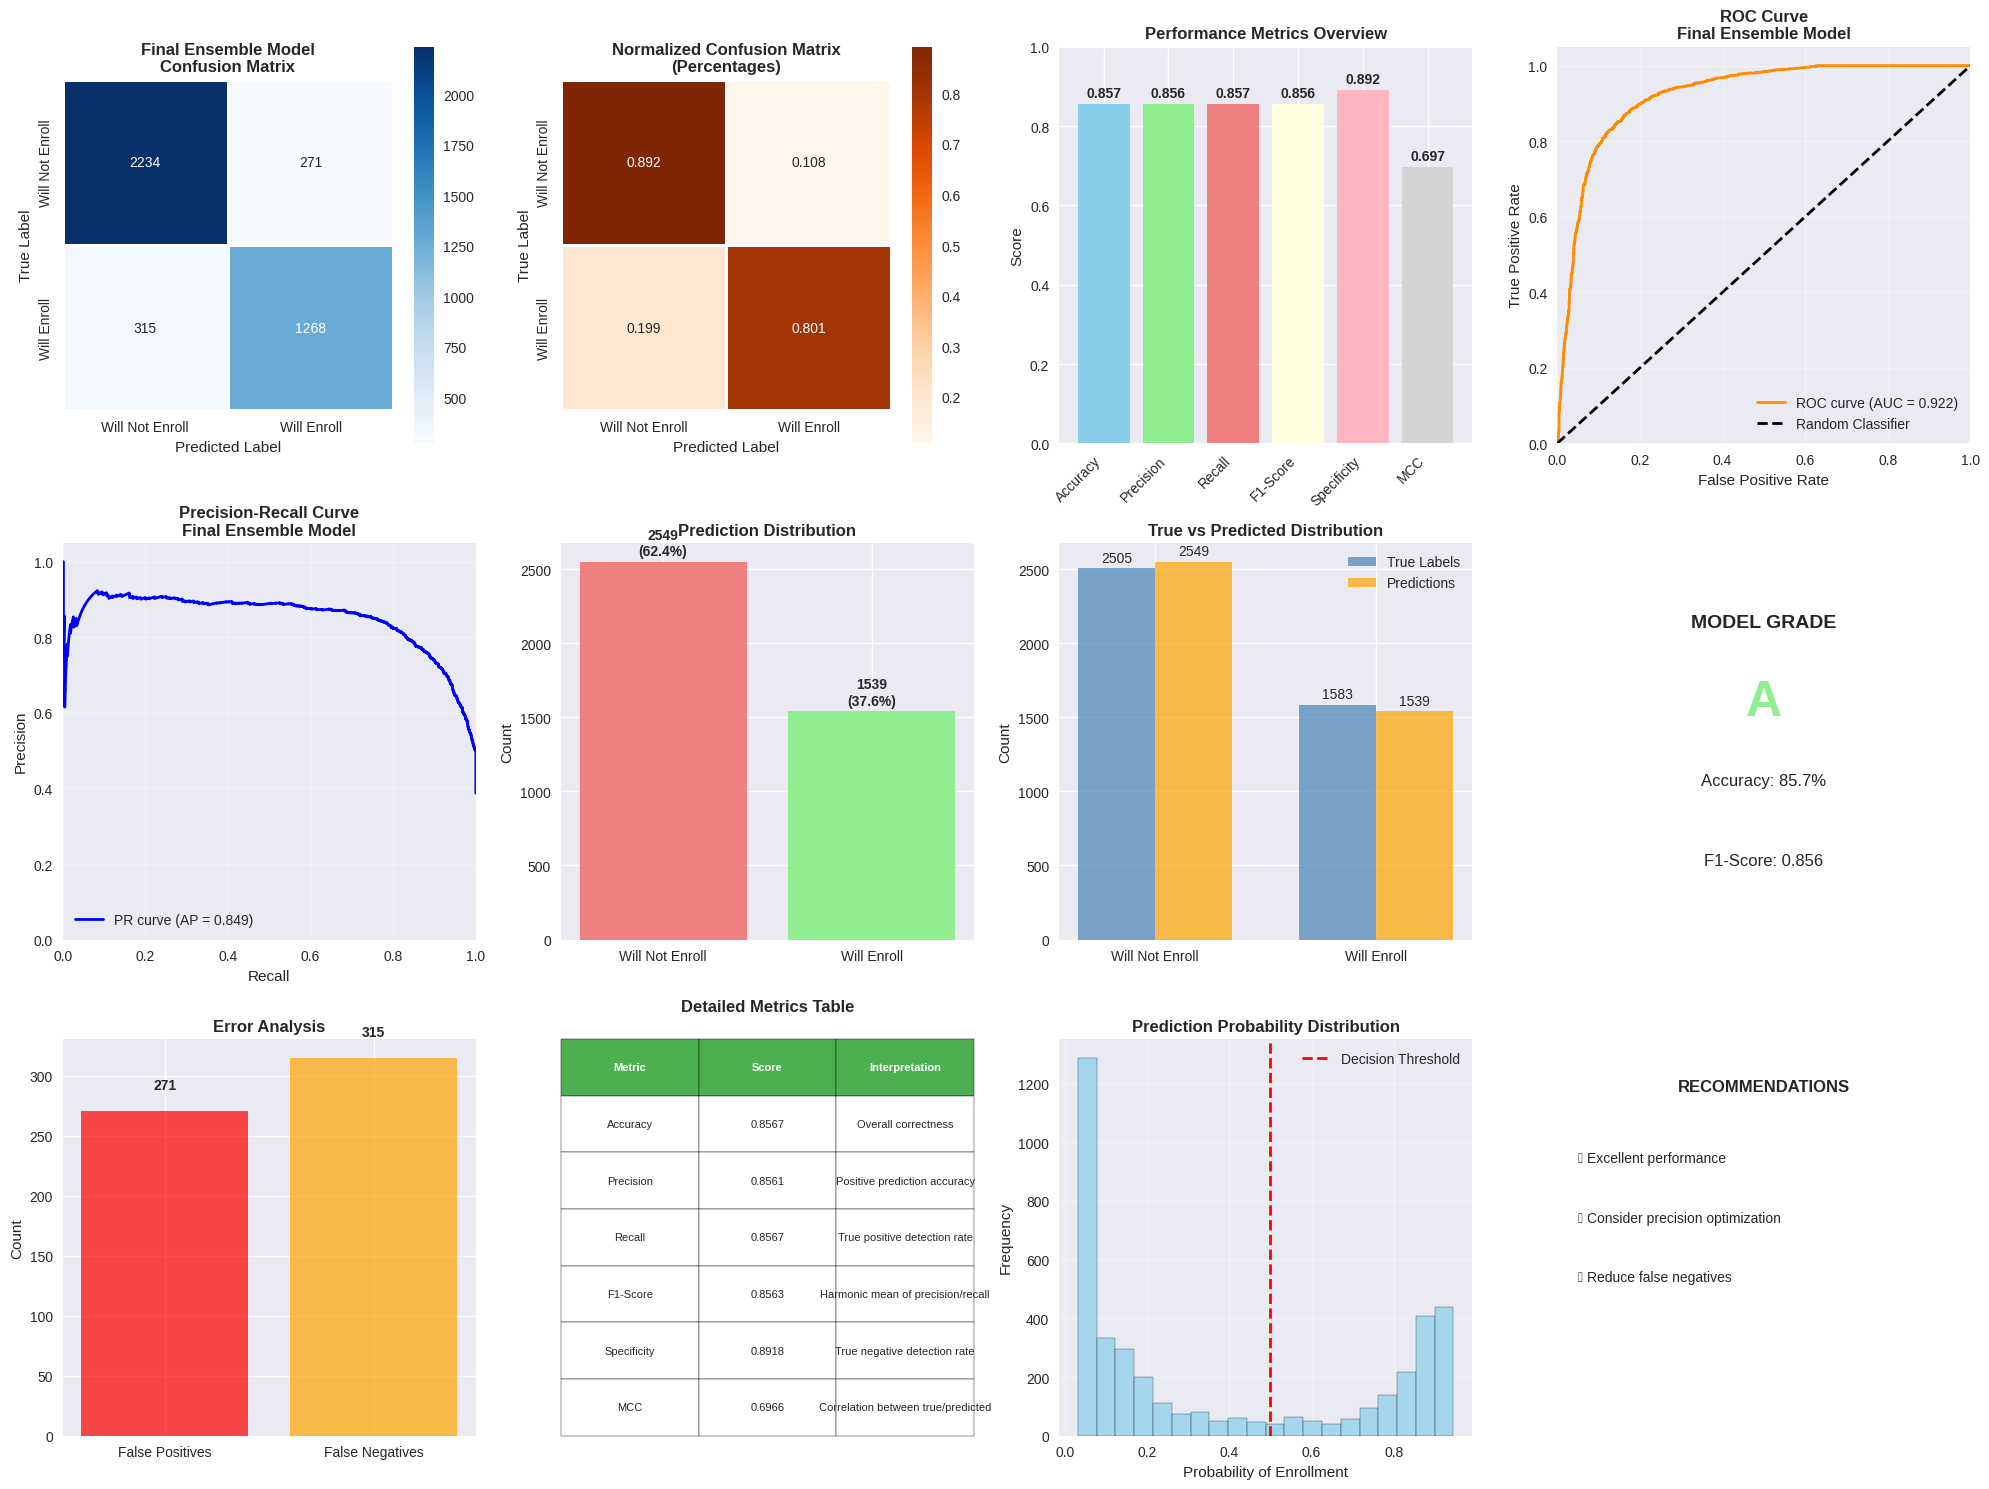


DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

Will Not Enroll       0.88      0.89      0.88      2505
    Will Enroll       0.82      0.80      0.81      1583

       accuracy                           0.86      4088
      macro avg       0.85      0.85      0.85      4088
   weighted avg       0.86      0.86      0.86      4088


FINAL SUMMARY:
Model Grade: A
Accuracy: 0.8567
F1-Score: 0.8563
Matthews Correlation Coefficient: 0.6966


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    cohen_kappa_score
)
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def evaluate_final_model(y_test, final_predictions, final_probabilities=None, model_name="Final Ensemble Model"):
    """
    Comprehensive evaluation of the final model with detailed visualizations and metrics

    Parameters:
    y_test: true labels
    final_predictions: predictions from final model
    final_probabilities: prediction probabilities (optional, for ROC curves)
    model_name: name of the final model
    """

    print("="*70)
    print(f"COMPREHENSIVE EVALUATION: {model_name.upper()}")
    print("="*70)

    # Calculate all metrics
    accuracy = accuracy_score(y_test, final_predictions)
    precision = precision_score(y_test, final_predictions, average='weighted')
    recall = recall_score(y_test, final_predictions, average='weighted')
    f1 = f1_score(y_test, final_predictions, average='weighted')

    # Additional metrics
    precision_macro = precision_score(y_test, final_predictions, average='macro')
    recall_macro = recall_score(y_test, final_predictions, average='macro')
    f1_macro = f1_score(y_test, final_predictions, average='macro')

    # Advanced metrics
    mcc = matthews_corrcoef(y_test, final_predictions)
    kappa = cohen_kappa_score(y_test, final_predictions)

    # Print basic metrics
    print(f"\nBASIC PERFORMANCE METRICS:")
    print(f"{'='*40}")
    print(f"Accuracy:           {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted):    {recall:.4f}")
    print(f"F1-Score (weighted):  {f1:.4f}")
    print(f"\nMACRO AVERAGES:")
    print(f"{'='*40}")
    print(f"Precision (macro):  {precision_macro:.4f}")
    print(f"Recall (macro):     {recall_macro:.4f}")
    print(f"F1-Score (macro):   {f1_macro:.4f}")
    print(f"\nADVANCED METRICS:")
    print(f"{'='*40}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"Cohen's Kappa Score:             {kappa:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate per-class metrics
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value

    print(f"\nDETAILED CLASSIFICATION METRICS:")
    print(f"{'='*40}")
    print(f"True Positives:   {tp}")
    print(f"True Negatives:   {tn}")
    print(f"False Positives:  {fp}")
    print(f"False Negatives:  {fn}")
    print(f"Sensitivity (Recall):     {sensitivity:.4f}")
    print(f"Specificity:              {specificity:.4f}")
    print(f"Positive Predictive Value: {ppv:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")

    # Create comprehensive visualization
    fig = plt.figure(figsize=(20, 15))

    # 1. Confusion Matrix with detailed annotations
    plt.subplot(3, 4, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Will Not Enroll', 'Will Enroll'],
               yticklabels=['Will Not Enroll', 'Will Enroll'],
               square=True, linewidths=1)
    plt.title(f'{model_name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # 2. Normalized Confusion Matrix
    plt.subplot(3, 4, 2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Oranges',
               xticklabels=['Will Not Enroll', 'Will Enroll'],
               yticklabels=['Will Not Enroll', 'Will Enroll'],
               square=True, linewidths=1)
    plt.title('Normalized Confusion Matrix\n(Percentages)', fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # 3. Metrics Bar Chart
    plt.subplot(3, 4, 3)
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'MCC']
    metrics_values = [accuracy, precision, recall, f1, specificity, mcc]
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray']

    bars = plt.bar(metrics_names, metrics_values, color=colors)
    plt.title('Performance Metrics Overview', fontsize=12, fontweight='bold')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

    # Add value labels on bars
    for bar, value in zip(bars, metrics_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    # 4. ROC Curve (if probabilities available)
    if final_probabilities is not None:
        plt.subplot(3, 4, 4)
        if len(final_probabilities.shape) > 1 and final_probabilities.shape[1] > 1:
            prob_pos = final_probabilities[:, 1]
        else:
            prob_pos = final_probabilities

        fpr, tpr, _ = roc_curve(y_test, prob_pos)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve\n{model_name}', fontsize=12, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
    else:
        plt.subplot(3, 4, 4)
        plt.text(0.5, 0.5, 'ROC Curve\n(Requires probabilities)',
                ha='center', va='center', transform=plt.gca().transAxes,
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.axis('off')

    # 5. Precision-Recall Curve (if probabilities available)
    if final_probabilities is not None:
        plt.subplot(3, 4, 5)
        if len(final_probabilities.shape) > 1 and final_probabilities.shape[1] > 1:
            prob_pos = final_probabilities[:, 1]
        else:
            prob_pos = final_probabilities

        precision_curve, recall_curve, _ = precision_recall_curve(y_test, prob_pos)
        avg_precision = average_precision_score(y_test, prob_pos)

        plt.plot(recall_curve, precision_curve, color='blue', lw=2,
                label=f'PR curve (AP = {avg_precision:.3f})')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve\n{model_name}', fontsize=12, fontweight='bold')
        plt.legend(loc="lower left")
        plt.grid(True, alpha=0.3)
    else:
        plt.subplot(3, 4, 5)
        plt.text(0.5, 0.5, 'Precision-Recall Curve\n(Requires probabilities)',
                ha='center', va='center', transform=plt.gca().transAxes,
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.axis('off')

    # 6. Prediction Distribution
    plt.subplot(3, 4, 6)
    unique, counts = np.unique(final_predictions, return_counts=True)
    total_predictions = len(final_predictions)
    percentages = (counts / total_predictions) * 100

    colors = ['lightcoral', 'lightgreen']
    labels = ['Will Not Enroll', 'Will Enroll']

    bars = plt.bar(labels[:len(unique)], counts, color=colors[:len(unique)])
    plt.title('Prediction Distribution', fontsize=12, fontweight='bold')
    plt.ylabel('Count')

    # Add percentage labels
    for bar, count, pct in zip(bars, counts, percentages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

    # 7. True vs Predicted Distribution
    plt.subplot(3, 4, 7)
    true_unique, true_counts = np.unique(y_test, return_counts=True)

    x = np.arange(len(labels))
    width = 0.35

    bars1 = plt.bar(x - width/2, true_counts, width, label='True Labels', color='steelblue', alpha=0.7)
    bars2 = plt.bar(x + width/2, counts, width, label='Predictions', color='orange', alpha=0.7)

    plt.title('True vs Predicted Distribution', fontsize=12, fontweight='bold')
    plt.ylabel('Count')
    plt.xticks(x, labels)
    plt.legend()

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + max(max(true_counts), max(counts))*0.01,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

    # 8. Model Performance Summary Card
    plt.subplot(3, 4, 8)
    plt.axis('off')

    # Performance grade
    if accuracy >= 0.9:
        grade = "A+"
        color = "green"
    elif accuracy >= 0.85:
        grade = "A"
        color = "lightgreen"
    elif accuracy >= 0.8:
        grade = "B"
        color = "yellow"
    elif accuracy >= 0.75:
        grade = "C"
        color = "orange"
    else:
        grade = "D"
        color = "red"

    plt.text(0.5, 0.8, 'MODEL GRADE', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    plt.text(0.5, 0.6, grade, ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=36, color=color, fontweight='bold')
    plt.text(0.5, 0.4, f'Accuracy: {accuracy:.1%}', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.5, 0.2, f'F1-Score: {f1:.3f}', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=12)

    # 9. Error Analysis
    plt.subplot(3, 4, 9)
    error_types = ['False Positives', 'False Negatives']
    error_counts = [fp, fn]
    error_colors = ['red', 'orange']

    bars = plt.bar(error_types, error_counts, color=error_colors, alpha=0.7)
    plt.title('Error Analysis', fontsize=12, fontweight='bold')
    plt.ylabel('Count')

    for bar, count in zip(bars, error_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(error_counts)*0.05,
                f'{count}', ha='center', va='bottom', fontweight='bold')

    # 10. Metrics Comparison Table
    plt.subplot(3, 4, 10)
    plt.axis('off')

    table_data = [
        ['Metric', 'Score', 'Interpretation'],
        ['Accuracy', f'{accuracy:.4f}', 'Overall correctness'],
        ['Precision', f'{precision:.4f}', 'Positive prediction accuracy'],
        ['Recall', f'{recall:.4f}', 'True positive detection rate'],
        ['F1-Score', f'{f1:.4f}', 'Harmonic mean of precision/recall'],
        ['Specificity', f'{specificity:.4f}', 'True negative detection rate'],
        ['MCC', f'{mcc:.4f}', 'Correlation between true/predicted']
    ]

    table = plt.table(cellText=table_data[1:],
                     colLabels=table_data[0],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1.5)

    # Color code the header
    for i in range(len(table_data[0])):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')

    plt.title('Detailed Metrics Table', fontsize=12, fontweight='bold', pad=20)

    # 11. Probability Distribution (if available)
    if final_probabilities is not None:
        plt.subplot(3, 4, 11)
        if len(final_probabilities.shape) > 1:
            prob_enroll = final_probabilities[:, 1]
        else:
            prob_enroll = final_probabilities

        plt.hist(prob_enroll, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
        plt.xlabel('Probability of Enrollment')
        plt.ylabel('Frequency')
        plt.title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
    else:
        plt.subplot(3, 4, 11)
        plt.text(0.5, 0.5, 'Probability Distribution\n(Requires probabilities)',
                ha='center', va='center', transform=plt.gca().transAxes,
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        plt.axis('off')

    # 12. Model Recommendations
    plt.subplot(3, 4, 12)
    plt.axis('off')

    recommendations = []
    if accuracy > 0.85:
        recommendations.append("✅ Excellent performance")
    elif accuracy > 0.8:
        recommendations.append("✅ Good performance")
    else:
        recommendations.append("⚠️ Consider model improvement")

    if precision < recall:
        recommendations.append("📊 Consider precision optimization")
    elif recall < precision:
        recommendations.append("📊 Consider recall optimization")
    else:
        recommendations.append("⚖️ Balanced precision-recall")

    if fp > fn:
        recommendations.append("🎯 Reduce false positives")
    elif fn > fp:
        recommendations.append("🎯 Reduce false negatives")
    else:
        recommendations.append("🎯 Balanced error types")

    plt.text(0.5, 0.9, 'RECOMMENDATIONS', ha='center', va='top',
             transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

    for i, rec in enumerate(recommendations[:4]):  # Limit to 4 recommendations
        plt.text(0.05, 0.7 - i*0.15, rec, ha='left', va='center',
                transform=plt.gca().transAxes, fontsize=10)

    plt.tight_layout()
    plt.show()

    # Detailed Classification Report
    print(f"\n{'='*70}")
    print("DETAILED CLASSIFICATION REPORT")
    print(f"{'='*70}")
    print(classification_report(y_test, final_predictions,
                              target_names=['Will Not Enroll', 'Will Enroll']))

    # Return comprehensive results
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'specificity': specificity,
        'mcc': mcc,
        'kappa': kappa,
        'confusion_matrix': cm,
        'true_positives': tp,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn,
        'grade': grade,
        'recommendations': recommendations
    }

# Example usage with your code:
if __name__ == "__main__":
    # Your original code
    from sklearn.metrics import accuracy_score

    acc1 = accuracy_score(y_test, final_predictions)
    print("Final Model Accuracy:", acc1)

    print("\n" + "="*70)
    print("COMPREHENSIVE FINAL MODEL EVALUATION")
    print("="*70)

    # Enhanced evaluation
    # If you have final probabilities:
    # final_probabilities = your_final_model.predict_proba(X_test)
    # results = evaluate_final_model(y_test, final_predictions, final_probabilities, "Final Ensemble Model")

    # Without probabilities:
    results = evaluate_final_model(y_test, final_predictions, final_probabilities, model_name="Final Ensemble Model")

    print(f"\nFINAL SUMMARY:")
    print(f"Model Grade: {results['grade']}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"F1-Score: {results['f1_score']:.4f}")
    print(f"Matthews Correlation Coefficient: {results['mcc']:.4f}")

In [22]:
import joblib
def save_all_models(meta_model, model1, model2, model3, columns):
    joblib.dump(meta_model, 'meta_model.pkl')
    joblib.dump(model1, 'base_model1.pkl')
    joblib.dump(model2, 'base_model2.pkl')
    joblib.dump(model3, 'base_model3.pkl')
    joblib.dump(columns, 'training_columns.pkl')
    print("✓ All models and training columns saved successfully.")

save_all_models(meta_model, model1, model2, model3, X_train_encoded.columns)

✓ All models and training columns saved successfully.


In [29]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b95c9c4b79c02f9210d610ebd486095eb59c0eba81bfe93bbaa06ad7ec8d48e9
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, classification_report
import joblib
from lime.lime_tabular import LimeTabularExplainer

# ===============================================
# COMPLETE STACKING PIPELINE (NUMPY-FRIENDLY)
# ===============================================

# --- PARAMETERS ---
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# --- BASE MODELS ---
model1 = random_search_lr.best_estimator_   # Logistic Regression
model2 = random_search_rf.best_estimator_   # Random Forest
model3 = random_search_xgb.best_estimator_  # XGBoost

# --- OUT-OF-FOLD TRAINING STACK ---
train_stack = np.zeros((X_train_encoded.shape[0], 3))
lr_scores, rf_scores, xgb_scores = [], [], []

print(f"Starting {n_splits}-fold cross-validation for stacking...")

for i, (train_idx, val_idx) in enumerate(kf.split(X_train_encoded, y_train), 1):
    print(f"Processing fold {i}/{n_splits}...")

    # --- FOLD SPLIT ---
    X_train_fold = X_train_encoded.iloc[train_idx]
    X_val_fold = X_train_encoded.iloc[val_idx]
    y_train_fold = y_train.iloc[train_idx]
    y_val_fold = y_train.iloc[val_idx]

    # Convert to NumPy for XGBoost
    X_train_fold_np = X_train_fold.to_numpy()
    X_val_fold_np = X_val_fold.to_numpy()
    y_train_fold_np = y_train_fold.to_numpy()
    y_val_fold_np = y_val_fold.to_numpy()

    # --- TRAIN BASE MODELS ---
    model1.fit(X_train_fold, y_train_fold)           # LR
    model2.fit(X_train_fold, y_train_fold)           # RF
    model3.fit(X_train_fold_np, y_train_fold_np)     # XGB

    # --- VALIDATION PREDICTIONS ---
    val_preds1 = model1.predict_proba(X_val_fold)[:, 1]
    val_preds2 = model2.predict_proba(X_val_fold)[:, 1]
    val_preds3 = model3.predict_proba(X_val_fold_np)[:, 1]

    train_stack[val_idx, :] = np.column_stack([val_preds1, val_preds2, val_preds3])

    # --- F1-SCORES ---
    lr_scores.append(f1_score(y_val_fold, (val_preds1 > 0.5).astype(int)))
    rf_scores.append(f1_score(y_val_fold, (val_preds2 > 0.5).astype(int)))
    xgb_scores.append(f1_score(y_val_fold, (val_preds3 > 0.5).astype(int)))

print("✓ Training stack created successfully.")

# --- OUT-OF-FOLD PERFORMANCE ---
results = {
    "Logistic Regression": np.mean(lr_scores),
    "Random Forest": np.mean(rf_scores),
    "XGBoost": np.mean(xgb_scores)
}

best_model_name = max(results, key=results.get)
print("\n--- OUT-OF-FOLD PERFORMANCE ---")
for model_name, score in results.items():
    print(f"{model_name}: {score:.4f}")
print(f"Best performing base model: {best_model_name} ({results[best_model_name]:.4f})")

# --- TRAIN BASE MODELS ON FULL DATA ---
print("\nTraining base models on full training set...")
model1.fit(X_train_encoded, y_train)
model2.fit(X_train_encoded, y_train)
model3.fit(X_train_encoded.to_numpy(), y_train.to_numpy())

# --- CREATE TEST STACK ---
test_stack = np.column_stack([
    model1.predict_proba(X_test_encoded)[:, 1],
    model2.predict_proba(X_test_encoded)[:, 1],
    model3.predict_proba(X_test_encoded.to_numpy())[:, 1]
])
print("✓ Test stack created successfully.")

# --- TRAIN META-MODEL ---
print("\nTraining meta-model on stacked predictions...")
meta_model = LogisticRegression(random_state=42)
meta_model.fit(train_stack, y_train)
print(f"✓ Meta-model trained! Expects {meta_model.n_features_in_} features.")

# --- EVALUATE STACKED MODEL ---
individual_preds = [
    model1.predict(X_test_encoded),
    model2.predict(X_test_encoded),
    model3.predict(X_test_encoded.to_numpy())
]

stacked_predictions = meta_model.predict(test_stack)

# --- PERFORMANCE METRICS ---
performance = {
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, individual_preds[0]),
        "f1_score": f1_score(y_test, individual_preds[0])
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test, individual_preds[1]),
        "f1_score": f1_score(y_test, individual_preds[1])
    },
    "XGBoost": {
        "accuracy": accuracy_score(y_test, individual_preds[2]),
        "f1_score": f1_score(y_test, individual_preds[2])
    },
    "Stacked Ensemble": {
        "accuracy": accuracy_score(y_test, stacked_predictions),
        "f1_score": f1_score(y_test, stacked_predictions)
    }
}

print("\n" + "="*80)
print("FINAL PERFORMANCE COMPARISON")
print("="*80)

for model_name, metrics in performance.items():
    print(f"{model_name:<20} | Accuracy: {metrics['accuracy']:.4f} | F1-Score: {metrics['f1_score']:.4f}")

best_performer = max(performance.keys(), key=lambda x: performance[x]['f1_score'])
print(f"\n🏆 BEST MODEL: {best_performer} (F1-Score: {performance[best_performer]['f1_score']:.4f})")

print("\nDetailed Classification Report for Stacked Model:")
print(classification_report(y_test, stacked_predictions))

def predict_and_explain_student(student_dict, X_train_encoded, train_stack):
    """
    Predict enrollment for a student and explain the reasons using LIME.
    """
    # --- FIX LocalOrForeign ---
    student_dict['LocalOrForeign'] = "local" if student_dict.get("Permanent Country", "").lower() == "philippines" else "foreign"

    # Load models
    try:
        meta_model = joblib.load('meta_model.pkl')
        model1 = joblib.load('base_model1.pkl')
        model2 = joblib.load('base_model2.pkl')
        model3 = joblib.load('base_model3.pkl')
        training_columns = joblib.load('training_columns.pkl')
    except FileNotFoundError:
        return "❌ Model files not found. Please train models first."

    # Preprocess student
    df = pd.DataFrame([student_dict])
    df_encoded = pd.get_dummies(df).reindex(columns=training_columns, fill_value=0)

    # --- FIX: Convert data to float to avoid TypeError with LIME ---
    df_encoded_np = df_encoded.to_numpy().astype(float)
    X_train_encoded_np = X_train_encoded.to_numpy().astype(float)

    # Base model predictions (NumPy format)
    base_preds = np.column_stack([
        model1.predict_proba(df_encoded)[:, 1],
        model2.predict_proba(df_encoded)[:, 1],
        model3.predict_proba(df_encoded_np)[:, 1]
    ])

    # Meta-model prediction
    final_pred_proba = meta_model.predict_proba(base_preds)
    final_pred = np.argmax(final_pred_proba, axis=1)[0]
    prediction_text = "Will Enroll" if final_pred == 1 else "Will Not Enroll"

    # --- LIME Explanations ---

    # 1. Explain the Meta-Model Prediction
    print("--- Explaining Meta-Model Prediction ---")
    meta_explainer = LimeTabularExplainer(
        training_data=train_stack,
        feature_names=["Logistic Regression", "Random Forest", "XGBoost"],
        class_names=["Will Not Enroll", "Will Enroll"],
        mode='classification'
    )
    meta_exp = meta_explainer.explain_instance(
        base_preds[0],
        meta_model.predict_proba,
        num_features=3
    )

    meta_explanation = dict(meta_exp.as_list())

    # 2. Explain Each Base Model Prediction
    base_explanations = {}
    original_feature_names = X_train_encoded.columns.tolist()

    for i, model in enumerate([model1, model2, model3]):
        model_name = ["LR", "RF", "XGB"][i]

        # Create an explainer for the base model
        base_explainer = LimeTabularExplainer(
            # FIX: Use the converted NumPy array
            training_data=X_train_encoded_np,
            feature_names=original_feature_names,
            class_names=["Will Not Enroll", "Will Enroll"],
            mode='classification'
        )

        # Get explanation for the single student's prediction
        base_exp = base_explainer.explain_instance(
            # FIX: Use the converted NumPy array
            df_encoded_np[0],
            model.predict_proba,
            num_features=5  # You can adjust this number
        )
        base_explanations[model_name] = dict(base_exp.as_list())

    return {
        "Final Prediction": prediction_text,
        "Confidence": f"{max(final_pred_proba[0]):.2%}",
        "Meta-Model Explanation (Base Model Contributions)": meta_explanation,
        "Base Model Feature Contributions": base_explanations
    }


# --- STEP 7: TEST WITH EXAMPLE STUDENT ---
example_student = {
    'Program (First Choice)': "bachelor of science in information technology",
    'Program (Second Choice)': "bachelor of science in computer science",
    'Current Region': "region iv-b",
    'Current Province': "mindoro",
    'Current City':"calapan city",
    'Permanent Country': "philippines",
    'Permanent Region': "region iv-b",
    'Permanent Province': "mindoro",
    'Permanent City': "calapan city",
    'Student Type': "full-time student",
    'School Type': "public",
    'Age': "21"
}

# Fix: Ensure `LocalOrForeign` is a string, not a tuple
example_student['LocalOrForeign'] = "local" if example_student["Permanent Country"] == "philippines" else "foreign"
example_student['SameRegion'] = 1 if example_student['Current Region'] == example_student['Permanent Region'] else 0
example_student['SameProvince'] = 1 if example_student['Current Province'] == example_student['Permanent Province'] else 0
example_student['SameCity'] = 1 if example_student['Current City'] == example_student['Permanent City'] else 0


print("\n--- EXAMPLE STUDENT ---")
print(example_student)

# Ensure X_train_encoded and train_stack are available from the pipeline run
try:
    result = predict_and_explain_student(example_student, X_train_encoded, train_stack)
    print(result)
except NameError:
    print("Please run the full stacking pipeline first to define X_train_encoded and train_stack.")









Starting 5-fold cross-validation for stacking...
Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
✓ Training stack created successfully.

--- OUT-OF-FOLD PERFORMANCE ---
Logistic Regression: 0.8031
Random Forest: 0.7323
XGBoost: 0.7933
Best performing base model: Logistic Regression (0.8031)

Training base models on full training set...
✓ Test stack created successfully.

Training meta-model on stacked predictions...
✓ Meta-model trained! Expects 3 features.

FINAL PERFORMANCE COMPARISON
Logistic Regression  | Accuracy: 0.8530 | F1-Score: 0.8113
Random Forest        | Accuracy: 0.8041 | F1-Score: 0.7347
XGBoost              | Accuracy: 0.8535 | F1-Score: 0.8055
Stacked Ensemble     | Accuracy: 0.8564 | F1-Score: 0.8119

🏆 BEST MODEL: Stacked Ensemble (F1-Score: 0.8119)

Detailed Classification Report for Stacked Model:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     